In [3]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

from utils import *

import sys
sys.path.append("../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Shows files

In [4]:

config_names= ["MESSI+\nSAX+\nSIMD",
               #"MESSI+\nSFA+ED",
               "MESSI+\nSFA+ED+\nSIMD",
               #"MESSI+\nSFA+EW",
               "MESSI+\nSFA+EW+\nSIMD"]

        
path = "logs/MESSI_SFA_logs"
all_files = read_logs(log_type="query", path=path, config_names = config_names)

Dataset logs/MESSI_SFA_logs/ASTRO
Config logs/MESSI_SFA_logs/ASTRO/09
Queries 0 MESSI_QUERY_2024_06_20_15:53:48.csv ASTRO - gruenau1 - CPUs 09 MESSI_QUERY_2024_06_20_15:53:48.csv
Queries 1 MESSI_QUERY_2024_06_20_15:58:12.csv ASTRO - gruenau1 - CPUs 09 MESSI_QUERY_2024_06_20_15:58:12.csv
Queries 2 MESSI_QUERY_2024_06_20_16:01:00.csv ASTRO - gruenau1 - CPUs 09 MESSI_QUERY_2024_06_20_16:01:00.csv
Config logs/MESSI_SFA_logs/ASTRO/18
Queries 0 MESSI_QUERY_2024_06_20_17:52:46.csv ASTRO - gruenau1 - CPUs 18 MESSI_QUERY_2024_06_20_17:52:46.csv
Queries 1 MESSI_QUERY_2024_06_20_17:57:55.csv ASTRO - gruenau1 - CPUs 18 MESSI_QUERY_2024_06_20_17:57:55.csv
Queries 2 MESSI_QUERY_2024_06_20_18:00:24.csv ASTRO - gruenau1 - CPUs 18 MESSI_QUERY_2024_06_20_18:00:24.csv
Config logs/MESSI_SFA_logs/ASTRO/36
Queries 0 MESSI_QUERY_2024_06_05_12:51:39.csv ASTRO - gruenau1 - CPUs 36 MESSI_QUERY_2024_06_05_12:51:39.csv
Queries 1 MESSI_QUERY_2024_06_05_12:55:09.csv ASTRO - gruenau1 - CPUs 36 MESSI_QUERY_2024_06_05

In [5]:
query_times = pd.DataFrame(columns=["method", " approximate_distance", " distance", "config", "dataset"])

i = 0
for ds_name, files in all_files.items():
    df_all = pd.DataFrame()
    for name, file in files.items():
        df = pd.read_csv(file).iloc[:-1]  # last entry is the average        
        # df["querying time"] = df["querying time"] / 1_000_000

        #display(df.head())
        df["method"] = name
        df["config"] = file.split("/")[3]
        df["dataset"] = file.split("/")[2]
        df_all = pd.concat([df_all, df], ignore_index=True)  
        #display(df_all.head())
        query_times = pd.concat([query_times, df_all[["method", " approximate_distance", " distance", "config", "dataset"]]], ignore_index=True)

        i = i+1
        
# df_all.rename(columns={" approximate_distance" : "approximate distance"}, inplace=True)


In [6]:
subset = query_times.rename(columns={
    "config":"Cores", "dataset": "Dataset", "method": "Method",
    " approximate_distance" : "Approximate Distance",
    " distance" : "Distance"})
subset = subset[query_times.method.isin(["MESSI+\nSAX+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]   #"MESSI+\nSFA+ED+\nSIMD", 

subset["Fraction"] = subset["Distance"] / subset ["Approximate Distance"]
subset.fillna(1, inplace=True)
subset = subset[subset["Cores"]=="09"]
subset

,Method,Approximate Distance,Distance,Cores,Dataset,Fraction
0,MESSI+\nSAX+\nSIMD,0.000000,0.000000,09,ASTRO,1.000000
1,MESSI+\nSAX+\nSIMD,0.011769,0.011769,09,ASTRO,1.000000
2,MESSI+\nSAX+\nSIMD,0.047113,0.047113,09,ASTRO,1.000000
3,MESSI+\nSAX+\nSIMD,0.106084,0.106084,09,ASTRO,1.000000
4,MESSI+\nSAX+\nSIMD,1.191736,0.188722,09,ASTRO,0.158359
...,...,...,...,...,...,...
29395,MESSI+\nSFA+EW+\nSIMD,170.746002,170.746002,09,TXED,1.000000
29396,MESSI+\nSFA+EW+\nSIMD,294.859009,209.089691,09,TXED,0.709118
29397,MESSI+\nSFA+EW+\nSIMD,179.943893,151.904068,09,TXED,0.844175
29398,MESSI+\nSFA+EW+\nSIMD,298.943695,156.577347,09,TXED,0.523769


In [7]:
print(subset[subset.Method=="MESSI+\nSAX+\nSIMD"]["Fraction"].mean())
print(subset[subset.Method=="MESSI+\nSAX+\nSIMD"]["Fraction"].median())
print(subset[subset.Method=="MESSI+\nSFA+EW+\nSIMD"]["Fraction"].mean())
print(subset[subset.Method=="MESSI+\nSFA+EW+\nSIMD"]["Fraction"].median())

0.7037883628203454
0.7453256469569984
0.6899247837714362
0.7306506160786512


In [8]:
#fig, ax = plt.subplots(figsize=(10,5))
#sns.boxplot(x="Method", y="Fraction", data=subset, ax = ax)
#ax.set_title("Approx Distance by #Cores (mixed workload)")
# ax.set_xticklabels(g.get_xticklabels(), rotation=-30)
#ax.set_xlabel("Cores")
#sns.despine()
# ax.set_yscale("log")
#plt.show()

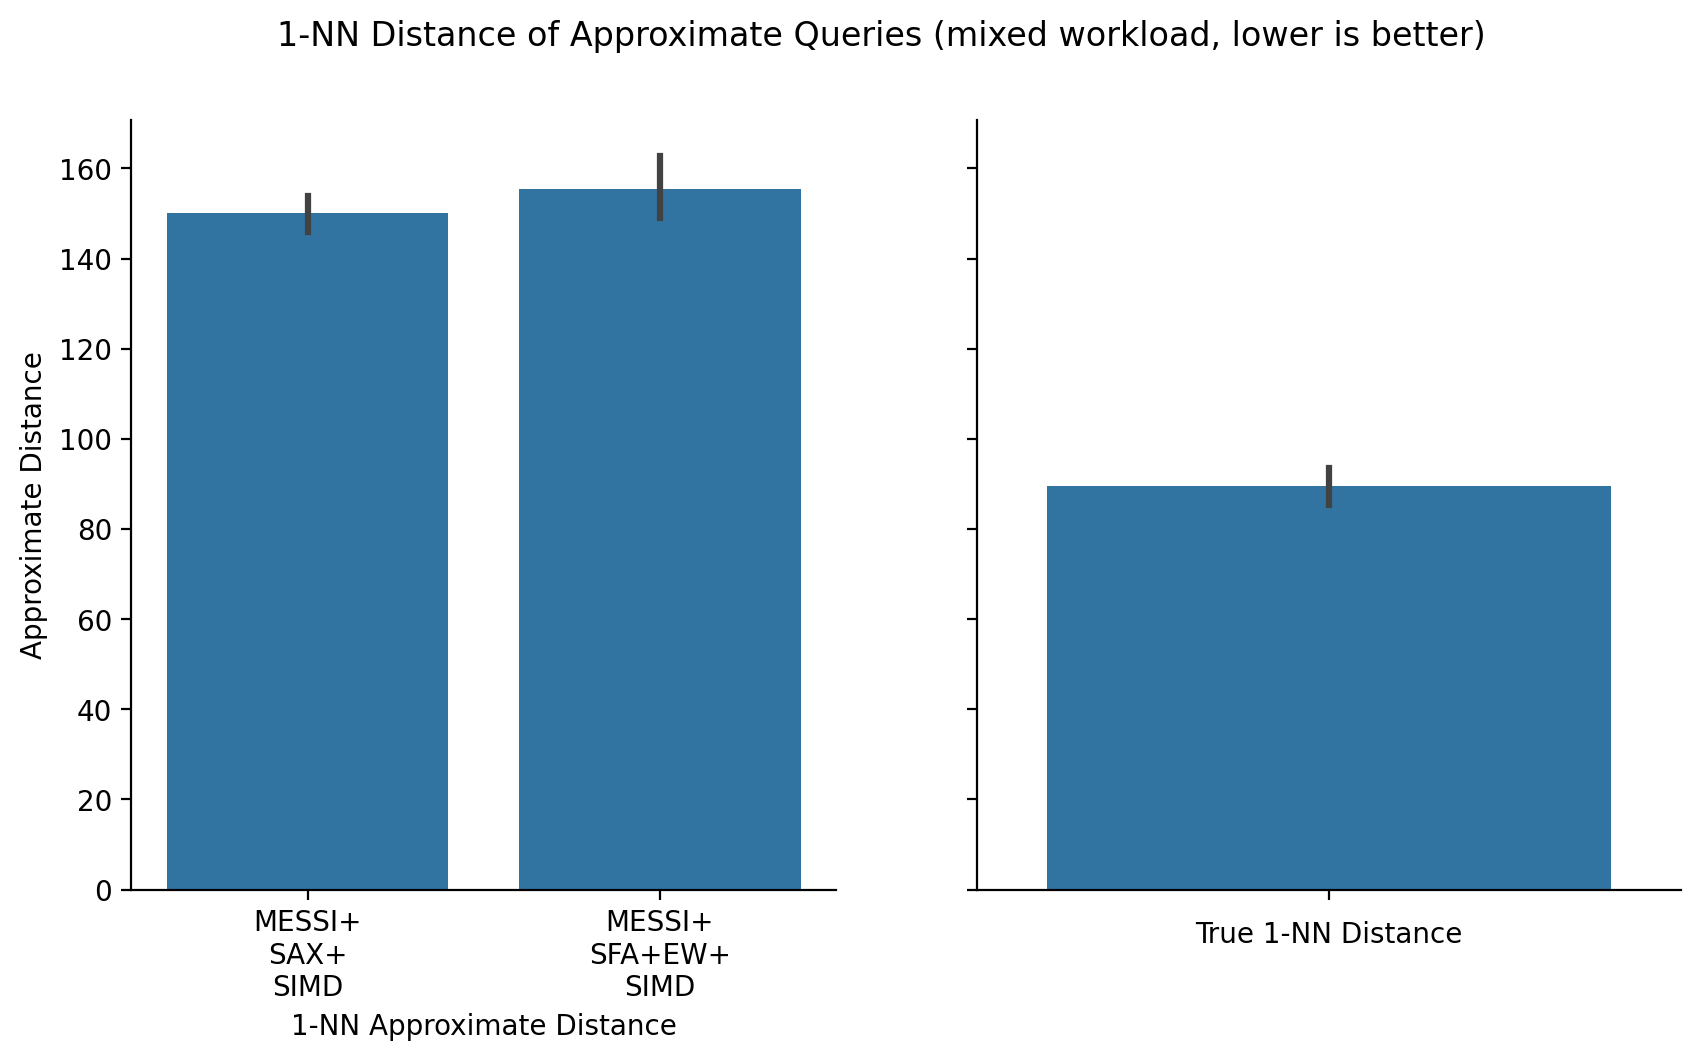

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
# sns.lineplot(x="Cores", y="Approximate Distance", hue="Method", estimator=np.mean,
#             style="Method", data=subset, ax = ax, errorbar=('ci', 99))
sns.barplot(x="Method", y="Approximate Distance", data=subset, ax = axes[0], estimator=np.mean)
axes[0].set_xlabel("1-NN Approximate Distance")
sns.despine()
sns.barplot(y="Distance", data=subset[subset.Method=="MESSI+\nSFA+EW+\nSIMD"], ax = axes[1], estimator=np.mean)
axes[1].set_xlabel("True 1-NN Distance")
sns.despine()

fig.suptitle("1-NN Distance of Approximate Queries (mixed workload, lower is better)")

# ax.set_xticklabels(g.get_xticklabels(), rotation=-30)

plt.show()

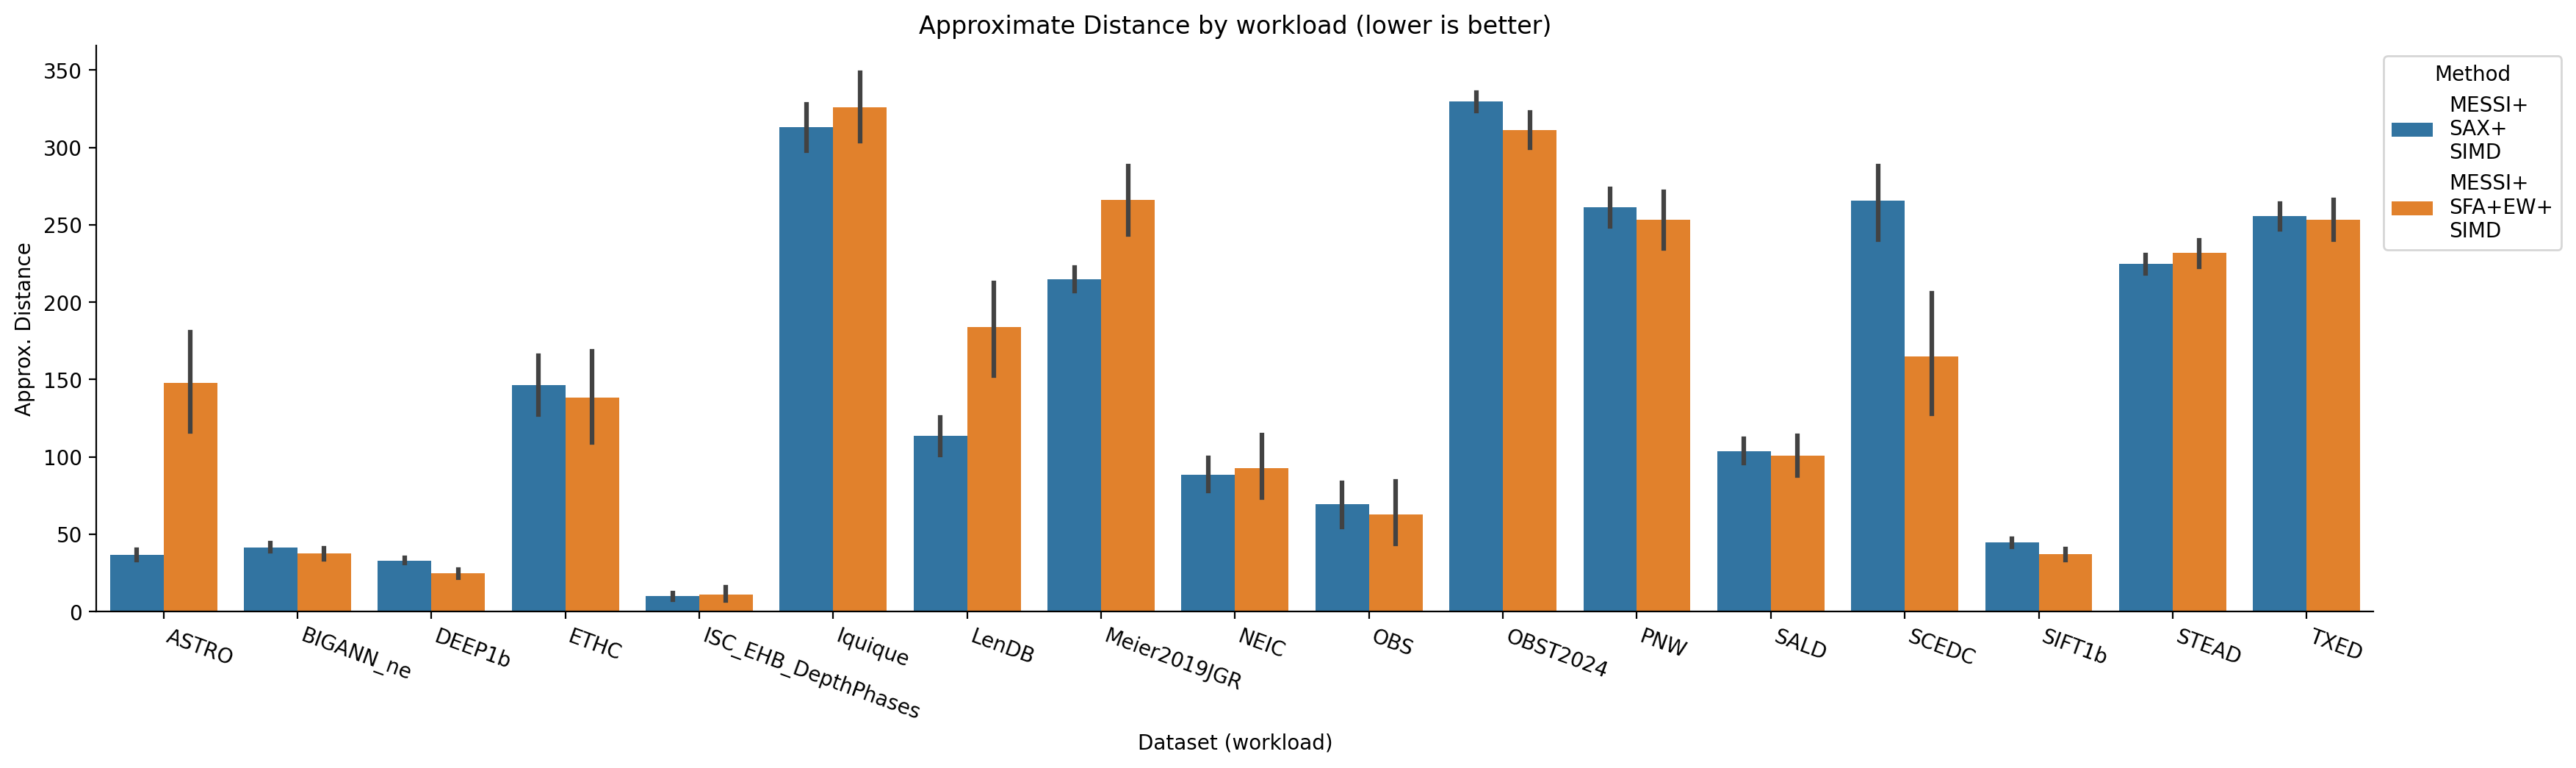

In [12]:
# plot_order = subset.set_index("Method").groupby("Dataset").mean().sort_values(by="query time in s")
plot_order = subset.set_index("Dataset").sort_values(by=["Dataset", "Method"])
# display(plot_order)

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="Dataset", y="Approximate Distance", estimator=np.mean, 
             hue="Method", data=subset, ax = ax,
             order=plot_order.index)
ax.set_title("Approximate Distance by workload (lower is better)")
ax.set_xlabel("Dataset (workload)")
ax.set_ylabel("Approx. Distance")
plt.xticks(rotation=-20, fontsize=10, ha='left')
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_yscale("log")
plt.savefig("images/approximate_distance.pdf", bbox_inches='tight')
plt.show()

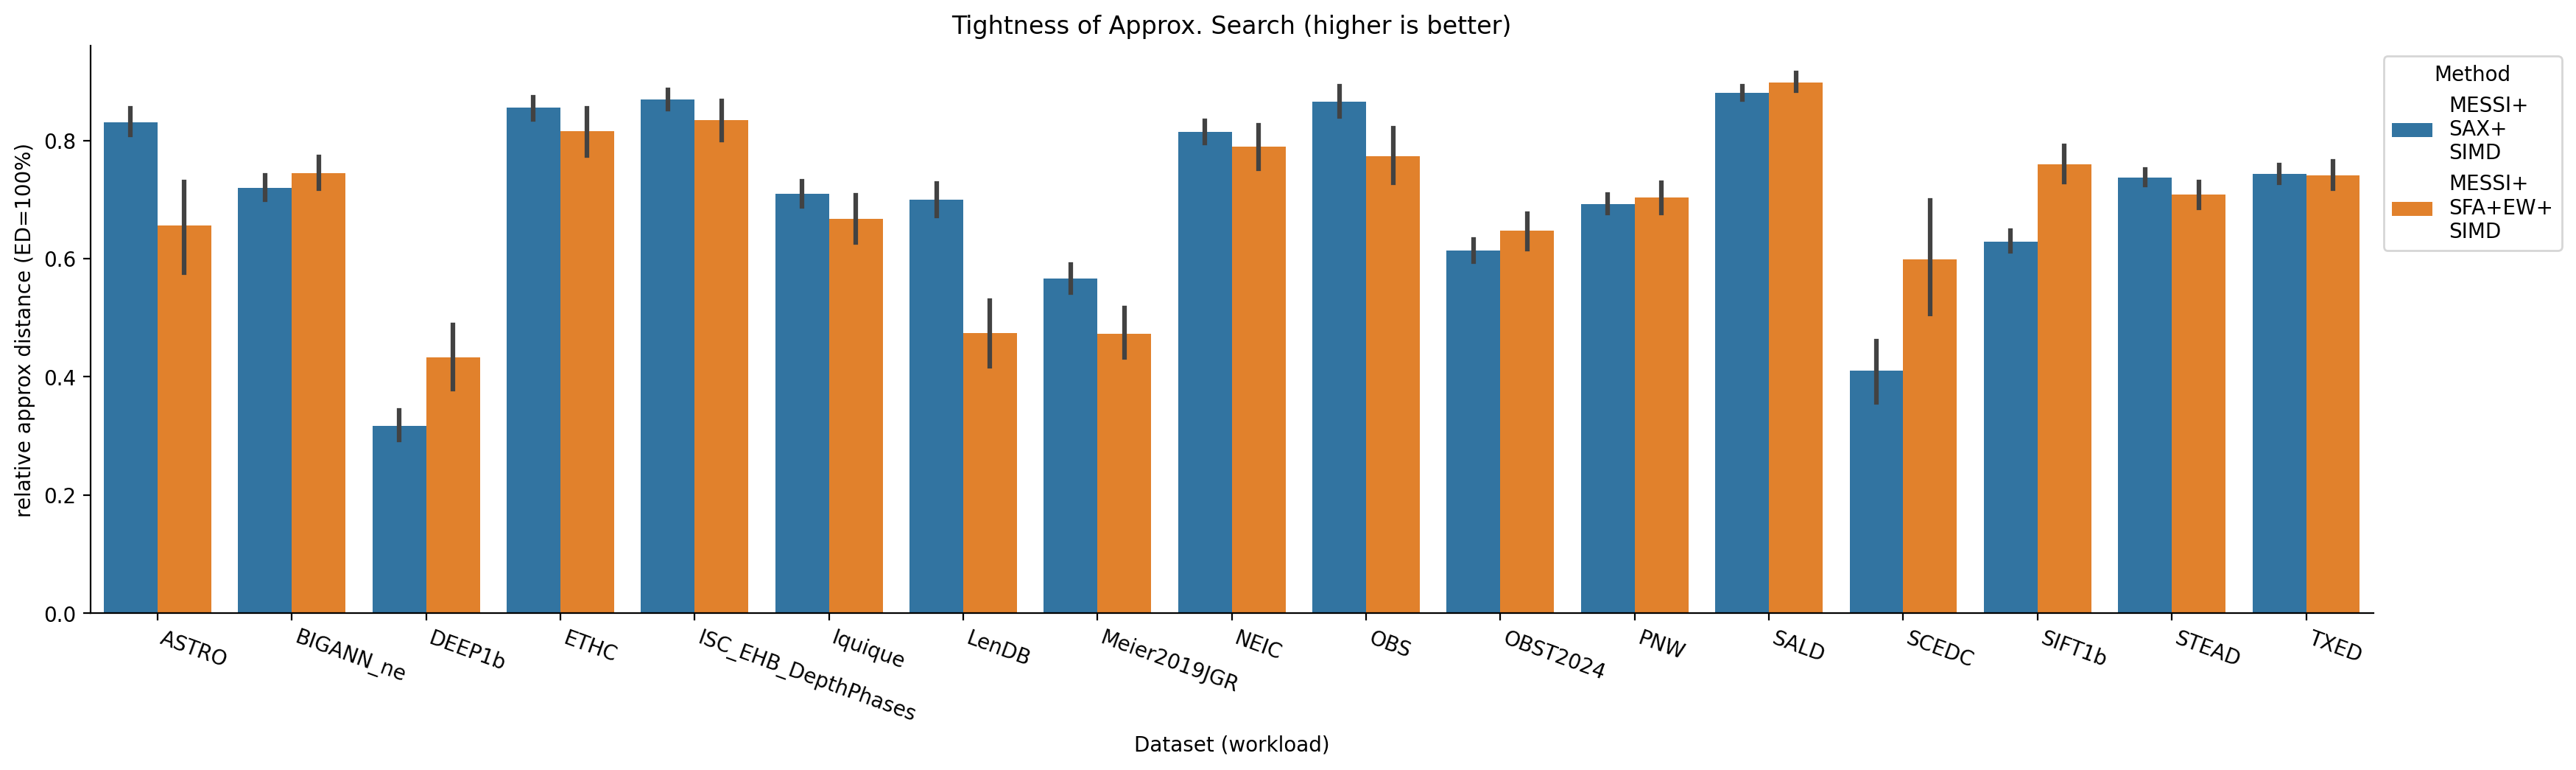

In [13]:
filtered = subset[subset["Distance"] > 0].reset_index()
# display(filtered)

df_normed = filtered.groupby(["Dataset"]) \
        .apply(lambda l: (l["Distance"]+1e-8) / (l["Approximate Distance"]+1e-8)).reset_index()
# display(df_normed)

df_mean = filtered.copy().reset_index()
df_mean["normed approx distance"] = df_normed[0]
# display(df_mean)

# plot_order = df_mean.set_index("Dataset").sort_values(by=["Dataset", "Method"])
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="Dataset", y="normed approx distance", estimator=np.mean, 
             hue="Method", data=df_mean, ax = ax,
             # order=plot_order.index
           )
ax.set_title("Tightness of Approx. Search (higher is better)")
ax.set_xlabel("Dataset (workload)")
ax.set_ylabel("relative approx distance (ED=100%)")
plt.xticks(rotation=-20, fontsize=10, ha='left')
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("images/relative_approximate_distance.pdf", bbox_inches='tight')
plt.show()